In [1]:
import nltk
import pandas as pd #for data handling
from textblob import TextBlob #for sentiment analysis
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

### Read data with pandas

In [2]:
df=pd.read_csv('/Users/macbook/Documents/Iron Hack_Lab/Week 8_NLP/Womens Clothing E-Commerce Reviews.csv')

In [3]:
#selected only useful columns for the process:
df=df[['Title','Review Text','Rating','Division Name','Department Name']]

### Filter data set with relevant subset of data

In [4]:
df.head(9)

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses


### Standardize column name- lower case 

In [5]:
#standardize column name
df.columns= df.columns.str.lower()

In [6]:
df.head(1)

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate


### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


- drop null data in Title and Review text
- Reset data frame index
- fill null data = Undefined in column Title

In [10]:
df['title'] = df['title'].fillna('undefined')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            23486 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


- visualize data with histogram

<AxesSubplot:>

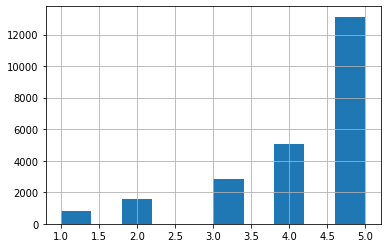

In [12]:
df['rating'].hist()

<AxesSubplot:>

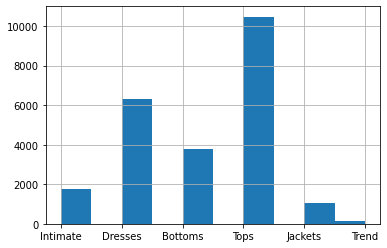

In [13]:
df['department name'].hist()

### Group & present data by division name, department name, sort by mean value

In [14]:
# groupby division, department based on average rating
df_groupby=df.groupby(['division name', 'department name'])['rating'].mean().sort_values(ascending=True)
df_groupby

division name   department name
General Petite  Trend              3.782609
General         Trend              3.822917
General Petite  Dresses            4.133256
General         Tops               4.148749
                Dresses            4.163003
General Petite  Tops               4.216469
General         Jackets            4.240310
General Petite  Intimate           4.240343
General         Bottoms            4.268686
Initmates       Intimate           4.286285
General Petite  Jackets            4.304910
                Bottoms            4.329356
Name: rating, dtype: float64

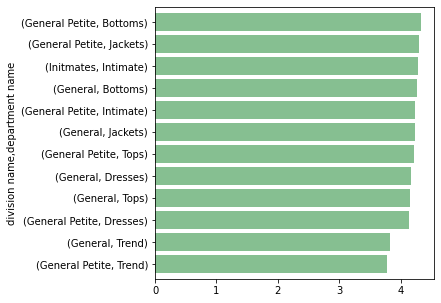

In [15]:
barchart = df_groupby.plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=0, width=0.85)

In [16]:
#expand the with of each row
pd.set_option('display.max_colwidth', None)

### Check review score from random review text rows

In [19]:
x1=df.loc[[2,3,5],['review text']]
x1

,review text
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c"
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."


In [20]:
testmonial1= TextBlob('I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c')
testmonial1.sentiment

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [21]:
testmonial= TextBlob('I love, love, love this jumpsuit. its fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!')
testmonial.sentiment

Sentiment(polarity=0.5499999999999999, subjectivity=0.625)

In [22]:
testmonial= TextBlob('I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.')
testmonial.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

### Break out text into sentences

In [23]:
TextBlob(df['review text'].loc[5]).sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

### Drop null data in review title

In [24]:
df.dropna(subset=['review text'],inplace=True)

In [28]:
cloth=df.reset_index(drop=True)

In [29]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            22641 non-null  object
 1   review text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division name    22628 non-null  object
 4   department name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 884.5+ KB


### Apply lambda to calculate the sentiment polarity

In [30]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [31]:
cloth['polarity']=cloth['review text'].apply(sentiment).apply(lambda x:x[0])

### Group & Present data by division name, depaartment name, sort by min value

In [35]:
cloth_min=cloth.groupby(['division name', 'department name'])['polarity'].min().sort_values(ascending=True)
cloth_min

division name   department name
General         Tops              -0.975000
                Dresses           -0.916667
                Jackets           -0.750000
General Petite  Tops              -0.700000
                Intimate          -0.575000
                Jackets           -0.562500
General         Bottoms           -0.533333
General Petite  Dresses           -0.400000
Initmates       Intimate          -0.392333
General         Trend             -0.270833
General Petite  Bottoms           -0.257778
                Trend             -0.083333
Name: polarity, dtype: float64

<AxesSubplot:ylabel='division name,department name'>

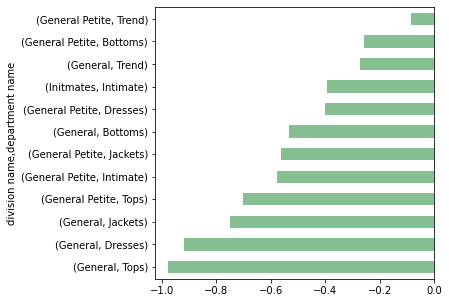

In [37]:
cloth_min.plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=0, width=0.55)

### Group & Present data by division name, depaartment name, sort by avg value

In [42]:
cloth_avg=cloth.groupby(['division name','department name'])['polarity'].mean().sort_values(ascending=True)
cloth_avg

division name   department name
General Petite  Trend              0.195925
General         Trend              0.203986
                Jackets            0.237141
General Petite  Intimate           0.239517
                Jackets            0.241773
General         Bottoms            0.245849
                Tops               0.247025
General Petite  Dresses            0.248380
General         Dresses            0.251091
General Petite  Tops               0.256835
Initmates       Intimate           0.256979
General Petite  Bottoms            0.259258
Name: polarity, dtype: float64

<AxesSubplot:ylabel='division name,department name'>

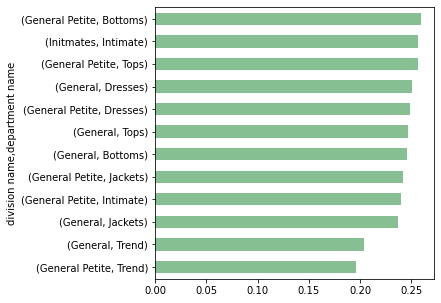

In [39]:
cloth_avg.plot(kind='barh', figsize=(5, 5), color='#86bf91', zorder=0, width=0.55)